# Plots of CCLM domains

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import valenspy as vp


# define machine name - used for paths of (observational) datasets
machine = 'hortense'

# reference dataset to compare to
model = 'CCLM'


manager = vp.InputManager(machine=machine)



In [2]:
years_to_analyse = range(1980,1985)

#ds_obs = ds_obs.sel(time = ds_obs.time.dt.year.isin(1995))

In [3]:
# load CPM simulation to extract domain rlat and rlons

ds_mod_cpm = manager.load_data(model, ['tas'], freq="daily", path_identifiers=["BE28_Nukleus", "mean"])

def extract_border_rlatlon(ds_belgium):
    # Extract the rlat/rlon of the outermost rows and columns (the border of the Belgian domain)
    rlat_border = xr.concat([ds_belgium['rlat'].isel(rlat=0),
                             ds_belgium['rlat'].isel(rlat=-1)], dim='points')

    rlon_border = xr.concat([ds_belgium['rlon'].isel(rlon=0), 
                             ds_belgium['rlon'].isel(rlon=-1),], dim='points')

    return rlat_border.values, rlon_border.values

rlat_border, rlon_border = extract_border_rlatlon(ds_mod_cpm.isel(time=1))


File paths found:
/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/BE28_Nukleus/T_2M/daily/T_2M_daymean.nc
tas
changing names
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
33.33% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tas']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole']


In [11]:
rlon_border

array([-3.263,  3.212], dtype=float32)

In [12]:
rlat_border

array([-4.013,  3.962], dtype=float32)

In [18]:
variable = 'tas'

experiment = 'CB2_CCLM_EUR11_ERA5_evaluation_urb'

pressure_levels = [850,700,500,250]


ds_eur11 = manager.load_data(model, [variable], freq="daily", path_identifiers=[experiment, "mean"])


#da_eur11 = ds_eur11[variable].mean('time')



File paths found:
/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_EUR11_ERA5_evaluation_urb/T_2M/daily/T_2M_daymean.nc


/dodrio/scratch/projects/2022_200/project_output/rcs/software/miniconda3/envs/valenspy_dev/lib/python3.9/site-packages/xarray/core/indexing.py:526: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(self.get_duck_array(), dtype=dtype)


Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
33.33% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tas']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole']


/dodrio/scratch/projects/2022_200/project_output/rcs/software/miniconda3/envs/valenspy_dev/lib/python3.9/site-packages/xarray/core/indexing.py:526: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(self.get_duck_array(), dtype=dtype)


In [3]:
xr.open_dataset('/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_EUR11_ERA5_evaluation_urb/T_2M/daily/T_2M_daymean.nc')

/dodrio/scratch/projects/2022_200/project_output/rcs/software/miniconda3/envs/valenspy_dev/lib/python3.9/site-packages/xarray/core/indexing.py:526: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(self.get_duck_array(), dtype=dtype)


<xarray.Dataset> Size: 5GB
Dimensions:       (time: 6085, bnds: 2, rlat: 434, rlon: 446)
Coordinates:
  * time          (time) datetime64[ns] 49kB 1864-07-03T05:17:37 ... 1981-11-...
    lon           (rlat, rlon) float32 774kB ...
    lat           (rlat, rlon) float32 774kB ...
  * rlon          (rlon) float32 2kB 71.14 71.1 71.05 71.0 ... 71.38 71.33 71.29
  * rlat          (rlat) float32 2kB 71.24 71.19 71.15 ... 67.05 66.99 66.92
    height_2m     float32 4B ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds     (time, bnds) datetime64[ns] 97kB ...
    rotated_pole  |S1 1B ...
    T_2M          (time, rlat, rlon) float32 5GB ...
Attributes: (12/15)
    CDI:             Climate Data Interface version 1.9.10 (https://mpimet.mp...
    Conventions:     CF-1.4
    source:          cosmo6.00_clm2, int2lm3.0_clm1
    institution:     KU Leuven, Leuven, BELGIUM
    title:           EUR11_NU_TT_EC
    project_id:      CORDEXbe2
    ...              ...
    contact:         FIEN SERRAS (fien.serras@kuleuven.be)
    references:      http://ees.kuleuven.be/rcs/
    creation_date:   2024-10-11 11:45:00
    history:         Wed Oct 16 12:51:28 2024: cdo mergetime T_2M_daymean_197...
    frequency:       day
    CDO:             Climate Data Operators version 1.9.10 (https://mpimet.mp...

ValueError: The input coordinate is not sorted in increasing order along axis 0. This can lead to unexpected results. Consider calling the `sortby` method on the input DataArray. To plot data with categorical axes, consider using the `heatmap` function from the `seaborn` statistical plotting library.

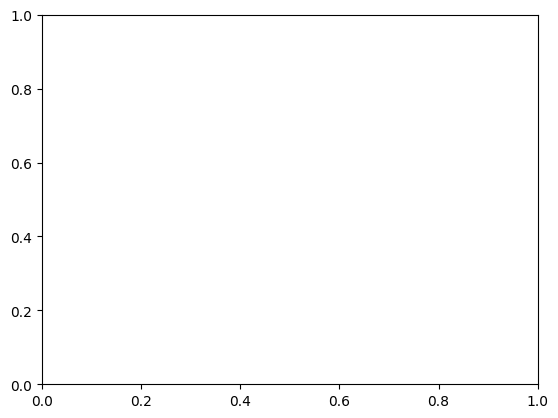

In [16]:
da_eur11.plot()

In [10]:
# from the EUR11 simulaiton, extract the borders 

europe_subset = da_eur11.sel(rlat=slice(rlat_border[0], rlat_border[1]), 
                              rlon=slice(rlon_border[0], rlon_border[1]))

bottom =  europe_subset.isel(rlat=0).values
top =  europe_subset.isel(rlat=-1).values
left = europe_subset.isel(rlon=0).values
right = europe_subset.isel(rlon=-1).values

border_values = np.concat([bottom,top,left,right])
border_values_mean = np.mean(border_values)

KeyError: np.float32(-4.013)

In [4]:
from valenspy._utilities import load_xarray_from_data_sources
from pathlib import Path
from valenspy.cf_checks import is_cf_compliant, cf_status
from valenspy._utilities import load_yml
from valenspy._unit_conversions import convert_all_units_to_CF
from valenspy.unit_conversion_functions import (
    _determine_time_interval,
    _convert_mm_to_kg_m2s,
)
import xarray as xr
import pandas as pd
import numpy as np
CORDEX_VARIABLES = load_yml("CORDEX_variables")


def _set_global_attributes(ds: xr.Dataset, metadata_info):
    for key, value in metadata_info.items():
        ds.attrs[key] = value

    return ds


def _rename_to_lon(ds: xr.Dataset, lon_name):
    return ds.rename_vars({ds.lon.name: lon_name})


def _rename_to_lat(ds: xr.Dataset, lat_name):
    return ds.rename_vars({ds.lat.name: lat_name})


variable = 'T500p'
experiment = 'CB2_CCLM_EUR11_ERA5_evaluation_urb'
files = manager._get_file_paths(model, [variable], freq="daily", path_identifiers=[experiment, "mean"])

files

[PosixPath('/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_EUR11_ERA5_evaluation_urb/T500p/daily/T500p_daymean.nc')]

In [11]:
ds = load_xarray_from_data_sources(files)
ds_conv = CCLM_to_CF(ds)

ta500
changing names
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
33.33% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['ta500']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole']


In [7]:
ds_conv

<xarray.Dataset> Size: 2GB
Dimensions:       (time: 2157, bnds: 2, rlat: 434, rlon: 446, pressure: 1)
Coordinates:
  * time          (time) datetime64[ns] 17kB 1979-01-01T09:00:00 ... 1984-11-...
    lon           (rlat, rlon) float32 774kB dask.array<chunksize=(434, 446), meta=np.ndarray>
    lat           (rlat, rlon) float32 774kB dask.array<chunksize=(434, 446), meta=np.ndarray>
  * rlon          (rlon) float32 2kB -29.58 -29.48 -29.36 ... 19.15 19.25 19.36
  * rlat          (rlat) float32 2kB -24.58 -24.48 -24.36 ... 22.83 22.93 23.05
  * pressure      (pressure) float32 4B 5e+04
Dimensions without coordinates: bnds
Data variables:
    time_bnds     (time, bnds) datetime64[ns] 35kB dask.array<chunksize=(2157, 2), meta=np.ndarray>
    rotated_pole  |S1 1B ...
    ta500         (time, pressure, rlat, rlon) float32 2GB dask.array<chunksize=(942, 1, 186, 191), meta=np.ndarray>
Attributes: (12/17)
    CDI:             Climate Data Interface version 1.9.10 (https://mpimet.mp...
    Conventions:     CF-1.4
    source:          cosmo6.00_clm2, int2lm3.0_clm1
    institution:     KU Leuven, Leuven, BELGIUM
    title:           EUR11_NU_TT_EC
    project_id:      CORDEXbe2
    ...              ...
    creation_date:   2024-10-11 11:17:13
    history:         Thu Oct 17 18:52:35 2024: cdo mergetime T500p_daymean_19...
    frequency:       day
    CDO:             Climate Data Operators version 1.9.10 (https://mpimet.mp...
    experiment:      
    dataset:         CCLM

In [10]:
def CCLM_to_CF(ds: xr.Dataset, metadata_info=None) -> xr.Dataset:
    """
    Convert the CCLM xarray netCDF to a CF compliant xarray Dataset

    Parameters
    ----------
    ds : xr.Dataset
        The xarray Dataset of CCLM simulation to convert
    metadata_info : dict, optional
        A dictionary containing additional metadata information to add to the dataset

    Returns
    -------
    Dataset
        The CF compliant CCLM model data for the specified variable.
    """

    # open observational specific lookyp dictionary - now hardcoded for EOBS, but this can be automated, potentially in the Path generator?
    model_name = "CCLM"

    # open observational specific lookup dictionary
    raw_LOOKUP = load_yml(f"{model_name}_lookup")

    if metadata_info is None:  # Set standard metadata if not provided
        metadata_info = {"experiment": ""}

    metadata_info["dataset"] = model_name

    # if working with pressure levels, the variable in the dataset is still the original name, and there is a pressure level coordinate
    # e.g. ta500 is T500p in the file name (raw_var), but still T in the dataset. 
    # therefore, if the pressure coordinate is available, rename the variable to the pressure level, matching the file name. 

    for raw_var in ds.data_vars:
        raw_var_pressure = raw_var+str(int(ds.pressure.values[0]/100))+'p'
        var = next(
            (k for k, v in raw_LOOKUP.items() if v.get("raw_name") == raw_var_pressure), None
        )
        if var: 
            ds = ds.rename_vars({raw_var: raw_var_pressure})

    ds = convert_all_units_to_CF(ds, raw_LOOKUP, metadata_info)

    # set attributes in whole dataset
    ds = _set_global_attributes(ds, metadata_info)

    # Soft check for CF compliance
    cf_status(ds)

    return ds

In [24]:
ds



<xarray.Dataset> Size: 5GB
Dimensions:       (time: 6085, bnds: 2, rlat: 434, rlon: 446)
Coordinates:
  * time          (time) datetime64[ns] 49kB 1864-07-03T05:17:37 ... 1981-11-...
    lon           (rlat, rlon) float32 774kB dask.array<chunksize=(434, 446), meta=np.ndarray>
    lat           (rlat, rlon) float32 774kB dask.array<chunksize=(434, 446), meta=np.ndarray>
  * rlon          (rlon) float32 2kB 71.14 71.1 71.05 71.0 ... 71.38 71.33 71.29
  * rlat          (rlat) float32 2kB 71.24 71.19 71.15 ... 67.05 66.99 66.92
    height_2m     float32 4B ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds     (time, bnds) datetime64[ns] 97kB dask.array<chunksize=(6085, 2), meta=np.ndarray>
    rotated_pole  |S1 1B ...
    T_2M          (time, rlat, rlon) float32 5GB dask.array<chunksize=(1867, 132, 136), meta=np.ndarray>
Attributes: (12/15)
    CDI:             Climate Data Interface version 1.9.10 (https://mpimet.mp...
    Conventions:     CF-1.4
    source:          cosmo6.00_clm2, int2lm3.0_clm1
    institution:     KU Leuven, Leuven, BELGIUM
    title:           EUR11_NU_TT_EC
    project_id:      CORDEXbe2
    ...              ...
    contact:         FIEN SERRAS (fien.serras@kuleuven.be)
    references:      http://ees.kuleuven.be/rcs/
    creation_date:   2024-10-11 11:45:00
    history:         Wed Oct 16 12:51:28 2024: cdo mergetime T_2M_daymean_197...
    frequency:       day
    CDO:             Climate Data Operators version 1.9.10 (https://mpimet.mp...

np.float32(288.821)